In [1]:
import pandas as pd
import numpy as np
from decimal import Decimal
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/house-rent-in-dhaka-city/houserentdhaka.csv


In [3]:
df = pd.read_csv("/kaggle/input/house-rent-in-dhaka-city/houserentdhaka.csv")
df.head()

,Unnamed: 0,Location,Area,Bed,Bath,Price
0,0,"Block H, Bashundhara R-A, Dhaka","1,600 sqft",3,3,20 Thousand
1,1,"Farmgate, Tejgaon, Dhaka",900 sqft,2,2,20 Thousand
2,2,"Block B, Nobodoy Housing Society, Mohammadpur,...","1,250 sqft",3,3,18 Thousand
3,3,"Gulshan 1, Gulshan, Dhaka","2,200 sqft",3,4,75 Thousand
4,4,"Baridhara, Dhaka","2,200 sqft",3,3,75 Thousand


In [4]:
df.shape

(28800, 6)

In [5]:
#removing the unnamed column
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [6]:
df.head()

,Location,Area,Bed,Bath,Price
0,"Block H, Bashundhara R-A, Dhaka","1,600 sqft",3,3,20 Thousand
1,"Farmgate, Tejgaon, Dhaka",900 sqft,2,2,20 Thousand
2,"Block B, Nobodoy Housing Society, Mohammadpur,...","1,250 sqft",3,3,18 Thousand
3,"Gulshan 1, Gulshan, Dhaka","2,200 sqft",3,4,75 Thousand
4,"Baridhara, Dhaka","2,200 sqft",3,3,75 Thousand


In [7]:
df.isnull().sum()

Location    0
Area        0
Bed         0
Bath        0
Price       0
dtype: int64

In [8]:
df['Area']=df['Area'].str.replace(',','')

In [9]:
df.head()

,Location,Area,Bed,Bath,Price
0,"Block H, Bashundhara R-A, Dhaka",1600 sqft,3,3,20 Thousand
1,"Farmgate, Tejgaon, Dhaka",900 sqft,2,2,20 Thousand
2,"Block B, Nobodoy Housing Society, Mohammadpur,...",1250 sqft,3,3,18 Thousand
3,"Gulshan 1, Gulshan, Dhaka",2200 sqft,3,4,75 Thousand
4,"Baridhara, Dhaka",2200 sqft,3,3,75 Thousand


In [10]:
#removing the sqft from the area and making them int values 
df['Area'] = df['Area'].apply(lambda x: int(x.split(' ')[0]))

In [11]:
df.head()

,Location,Area,Bed,Bath,Price
0,"Block H, Bashundhara R-A, Dhaka",1600,3,3,20 Thousand
1,"Farmgate, Tejgaon, Dhaka",900,2,2,20 Thousand
2,"Block B, Nobodoy Housing Society, Mohammadpur,...",1250,3,3,18 Thousand
3,"Gulshan 1, Gulshan, Dhaka",2200,3,4,75 Thousand
4,"Baridhara, Dhaka",2200,3,3,75 Thousand


In [12]:
df.Bed.unique()

array([3, 2, 4, 1, 5, 6])

In [13]:
df.Bath.unique()

array([3, 2, 4, 5, 1, 6, 8])

In [14]:
df[df.Bed>5]

,Location,Area,Bed,Bath,Price
304,"Gulshan 2, Gulshan, Dhaka",4500,6,6,2.8 Lakh
24464,"Tejturi Bazar, Tejgaon, Dhaka",2450,6,6,60 Thousand


In [15]:
df[df.Bath>6] #8 baths!! noice but why????? 

,Location,Area,Bed,Bath,Price
533,"Gulshan 2, Gulshan, Dhaka",4200,4,8,3 Lakh


In [16]:
df1 = df.copy()


In [17]:
#I wanted the make the price Thousand/Lakh values to a float values
def price_float(x):
    y = x.split(' ')[1]
    if y == "Thousand":
        return float(x.split(' ')[0]) * 1000
    else:
        return float(x.split(' ')[0]) * 100000 

In [18]:
df1.Price = df1.Price.apply(price_float)

In [19]:
df1.loc[304]

Location    Gulshan 2, Gulshan, Dhaka
Area                             4500
Bed                                 6
Bath                                6
Price                        280000.0
Name: 304, dtype: object

In [20]:
df1['price_per_sqft'] = df1['Price']/df1['Area']

In [21]:
df1.head()

,Location,Area,Bed,Bath,Price,price_per_sqft
0,"Block H, Bashundhara R-A, Dhaka",1600,3,3,20000.0,12.500000
1,"Farmgate, Tejgaon, Dhaka",900,2,2,20000.0,22.222222
2,"Block B, Nobodoy Housing Society, Mohammadpur,...",1250,3,3,18000.0,14.400000
3,"Gulshan 1, Gulshan, Dhaka",2200,3,4,75000.0,34.090909
4,"Baridhara, Dhaka",2200,3,3,75000.0,34.090909


In [22]:
len(df1['Location'].unique())

730

In [23]:
#removing the comma in the Area column
df1['Location']=df1['Location'].str.replace(',','') 

In [24]:
df1.head()

,Location,Area,Bed,Bath,Price,price_per_sqft
0,Block H Bashundhara R-A Dhaka,1600,3,3,20000.0,12.500000
1,Farmgate Tejgaon Dhaka,900,2,2,20000.0,22.222222
2,Block B Nobodoy Housing Society Mohammadpur Dhaka,1250,3,3,18000.0,14.400000
3,Gulshan 1 Gulshan Dhaka,2200,3,4,75000.0,34.090909
4,Baridhara Dhaka,2200,3,3,75000.0,34.090909


In [25]:
#Finding the locations with most number of houses
location_count = df1['Location'].value_counts(ascending=False)
location_count.head(30)

Mohammadpur Dhaka                                               757
Mirpur Dhaka                                                    556
Block D Section 12 Mirpur Dhaka                                 417
Dhanmondi Dhaka                                                 414
Block E Section 12 Mirpur Dhaka                                 411
Sector 10 Uttara Dhaka                                          357
Paikpara Ahmed Nagar Mirpur Dhaka                               352
Kallyanpur Mirpur Dhaka                                         337
Section 12 Mirpur Dhaka                                         311
Block B Section 12 Mirpur Dhaka                                 307
Joar Sahara Dhaka                                               305
Block C Section 12 Mirpur Dhaka                                 294
West Shewrapara Mirpur Dhaka                                    292
Shyamoli Dhaka                                                  285
PC Culture Housing Mohammadpur Dhaka            

In [26]:
#Finding locations with less than 10 houses 
len(location_count[location_count <= 10])

313

In [27]:
len(df1['Location'].unique())

730

In [28]:
#Keeping the locations with less houses together
location_count_under_10 = location_count[location_count <= 10]

In [29]:
#now leveling them as 'other' 
df1.Location = df1.Location.apply(lambda x: 'other' if x in location_count_under_10 else x)

In [30]:
#now we have less unique values which will incress our accuracy 
len(df1['Location'].unique())

418

In [31]:
#now founding the unrealistic Area to Bed ratio according to my Civil engineer friend
df1[df1.Area/df1.Bed<300].head(10)

,Location,Area,Bed,Bath,Price,price_per_sqft
39,other,800,3,2,15000.0,18.750000
86,Block C Section 13 Mirpur Dhaka,745,3,2,15000.0,20.134228
135,other,800,3,2,15000.0,18.750000
186,Nayatola Maghbazar Dhaka,550,2,2,13000.0,23.636364
191,Baitul Aman Housing Society Adabor Dhaka,550,2,1,8500.0,15.454545
193,Taltola Khilgaon Dhaka,550,2,1,11000.0,20.000000
195,South Monipur Mirpur Dhaka,850,3,2,13000.0,15.294118
205,other,800,3,2,15000.0,18.750000
252,Block C Kaderabad Housing Society Bosila Moham...,750,3,2,16000.0,21.333333
260,Faydabad Dakshin Khan Dhaka,800,3,2,8500.0,10.625000


In [32]:
df1.shape

(28800, 6)

In [33]:
#removing them from our df 
df2 = df1[~(df1.Area/df1.Bed<300)]
df2.shape

(27876, 6)

In [34]:
#Lets see the description of the 'price_per_sqft' 
df2.price_per_sqft.describe()

count    27876.000000
mean        18.946916
std          6.575892
min          6.500000
25%         15.384615
50%         18.000000
75%         20.952381
max        228.571429
Name: price_per_sqft, dtype: float64

In [35]:
def drop_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('Location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df3 = drop_outliers(df2)
df3.shape

(19913, 6)

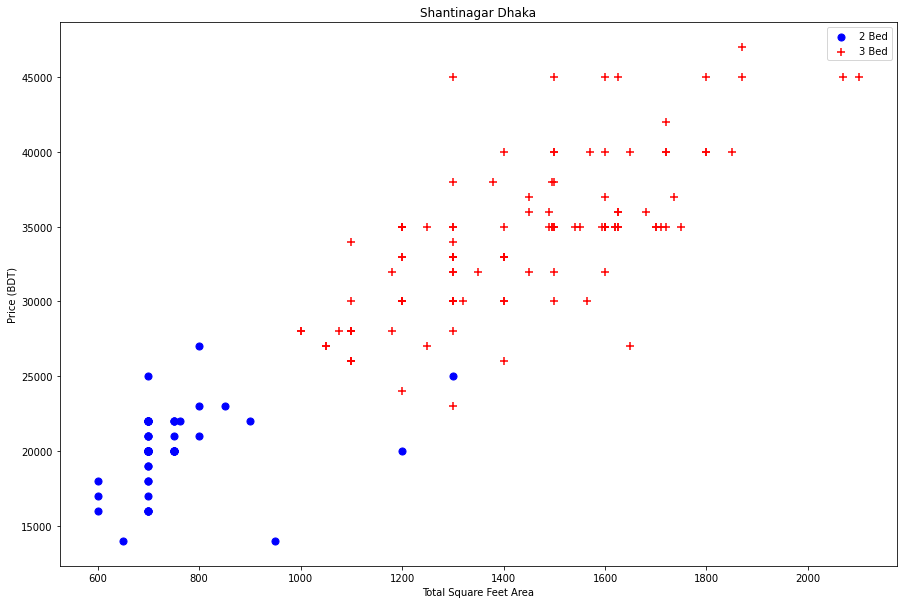

In [36]:
#Building a scatter chart 
def plot_scatter_chart(df,Location):
    bed2 = df[(df.Location==Location) & (df.Bed==2)]
    bed3 = df[(df.Location==Location) & (df.Bed==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bed2.Area,bed2.Price,color='blue',label='2 Bed', s=50)
    plt.scatter(bed3.Area,bed3.Price,marker='+', color='red',label='3 Bed', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (BDT)")
    plt.title(Location)
    plt.legend()
    
plot_scatter_chart(df3,"Shantinagar Dhaka")

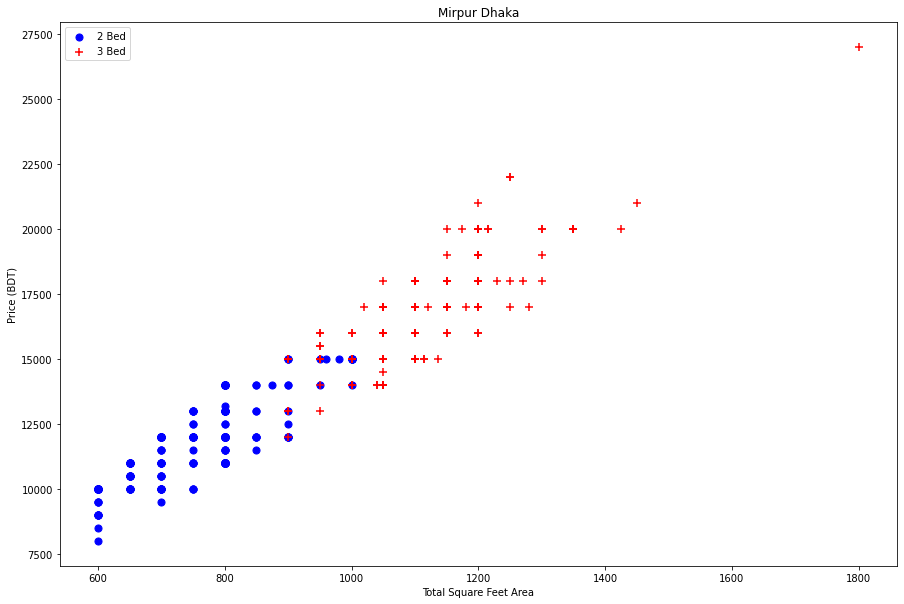

In [37]:
plot_scatter_chart(df3,"Mirpur Dhaka")

Text(0, 0.5, 'Count')

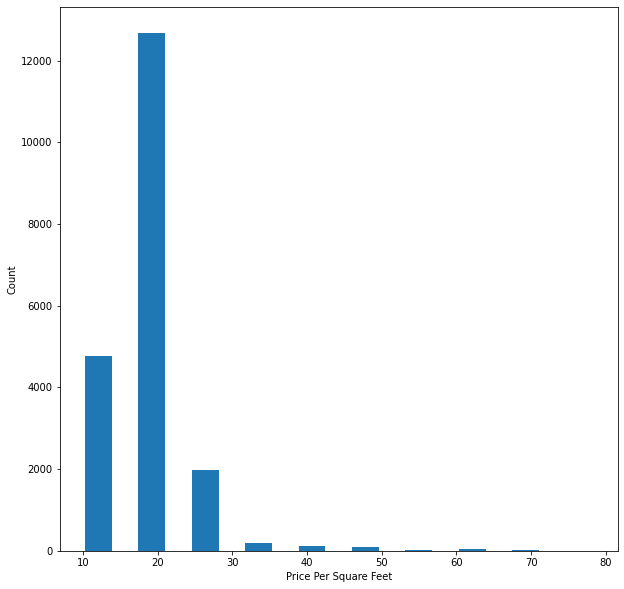

In [38]:
matplotlib.rcParams["figure.figsize"] = (10,10)
plt.hist(df3.price_per_sqft,rwidth=0.5)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [39]:
df3[df3.Bath>df3.Bed+1] # this number of bed to bath ratio seems normal so not droping them 

,Location,Area,Bed,Bath,Price,price_per_sqft
747,Avenue 6 Mirpur DOHS Mirpur Dhaka,2175,3,5,42000.0,19.310345
748,Avenue 6 Mirpur DOHS Mirpur Dhaka,2175,3,5,42000.0,19.310345
1227,Banani DOHS Dhaka,3000,3,5,130000.0,43.333333
1271,Banani Dhaka,2410,3,5,80000.0,33.195021
1688,Block A Bashundhara R-A Dhaka,2100,3,5,60000.0,28.571429
1689,Block A Bashundhara R-A Dhaka,2100,3,5,60000.0,28.571429
3967,Block D Bashundhara R-A Dhaka,3000,3,5,55000.0,18.333333
4038,Block D Bashundhara R-A Dhaka,1700,2,4,30000.0,17.647059
4112,Block D Bashundhara R-A Dhaka,2200,3,5,30000.0,13.636364
6097,Block J Baridhara Dhaka,2200,3,5,50000.0,22.727273


# Bulding categorical data

In [40]:
dummies = pd.get_dummies(df3.Location)
dummies.head()

,1st Colony Mirpur Dhaka,2nd Colony Mirpur Dhaka,3rd Colony Mirpur Dhaka,Aainusbag Dakshin Khan Dhaka,Abdullahbag Uttar Badda Badda Dhaka,Abdur Rafique Housing Society Shekhertek Mohammadpur Dhaka,Adabor Dhaka,Adarsha Para Uttar Khan Dhaka,Agargaon Dhaka,Ahmed Nagar Mirpur Dhaka,...,West Kazipara Mirpur Dhaka,West Mollartek Dakshin Khan Dhaka,West Monipur Mirpur Dhaka,West Nakhalpara Tejgaon Dhaka,West Rampura Rampura Dhaka,West Shewrapara Mirpur Dhaka,West Vatara Vatara Badda Dhaka,Zafrabad Hazaribag Dhaka,aziz Moholla Mohammadpur Dhaka,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
df4 = pd.concat([df3,dummies.drop('other',axis='columns')],axis='columns')
df4.head()

,Location,Area,Bed,Bath,Price,price_per_sqft,1st Colony Mirpur Dhaka,2nd Colony Mirpur Dhaka,3rd Colony Mirpur Dhaka,Aainusbag Dakshin Khan Dhaka,...,West Kalachandpur Kalachandpur Dhaka,West Kazipara Mirpur Dhaka,West Mollartek Dakshin Khan Dhaka,West Monipur Mirpur Dhaka,West Nakhalpara Tejgaon Dhaka,West Rampura Rampura Dhaka,West Shewrapara Mirpur Dhaka,West Vatara Vatara Badda Dhaka,Zafrabad Hazaribag Dhaka,aziz Moholla Mohammadpur Dhaka
0,1st Colony Mirpur Dhaka,800,2,2,13500.0,16.875000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Colony Mirpur Dhaka,700,2,2,12000.0,17.142857,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Colony Mirpur Dhaka,1100,3,3,20000.0,18.181818,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Colony Mirpur Dhaka,1100,3,3,20000.0,18.181818,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Colony Mirpur Dhaka,1020,3,2,15000.0,14.705882,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
df5 = df4.drop('Location',axis='columns') 
df5.head()

,Area,Bed,Bath,Price,price_per_sqft,1st Colony Mirpur Dhaka,2nd Colony Mirpur Dhaka,3rd Colony Mirpur Dhaka,Aainusbag Dakshin Khan Dhaka,Abdullahbag Uttar Badda Badda Dhaka,...,West Kalachandpur Kalachandpur Dhaka,West Kazipara Mirpur Dhaka,West Mollartek Dakshin Khan Dhaka,West Monipur Mirpur Dhaka,West Nakhalpara Tejgaon Dhaka,West Rampura Rampura Dhaka,West Shewrapara Mirpur Dhaka,West Vatara Vatara Badda Dhaka,Zafrabad Hazaribag Dhaka,aziz Moholla Mohammadpur Dhaka
0,800,2,2,13500.0,16.875000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,700,2,2,12000.0,17.142857,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1100,3,3,20000.0,18.181818,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1100,3,3,20000.0,18.181818,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1020,3,2,15000.0,14.705882,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Model Building 

In [43]:
X = df5.drop(['Price','price_per_sqft'],axis='columns') #Had to drop 'price_per_sqft' because it was confusing the model and giving random negative predictions 
X.head()

,Area,Bed,Bath,1st Colony Mirpur Dhaka,2nd Colony Mirpur Dhaka,3rd Colony Mirpur Dhaka,Aainusbag Dakshin Khan Dhaka,Abdullahbag Uttar Badda Badda Dhaka,Abdur Rafique Housing Society Shekhertek Mohammadpur Dhaka,Adabor Dhaka,...,West Kalachandpur Kalachandpur Dhaka,West Kazipara Mirpur Dhaka,West Mollartek Dakshin Khan Dhaka,West Monipur Mirpur Dhaka,West Nakhalpara Tejgaon Dhaka,West Rampura Rampura Dhaka,West Shewrapara Mirpur Dhaka,West Vatara Vatara Badda Dhaka,Zafrabad Hazaribag Dhaka,aziz Moholla Mohammadpur Dhaka
0,800,2,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,700,2,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1100,3,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1100,3,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1020,3,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
y = df5.Price
y.head()

0    13500.0
1    12000.0
2    20000.0
3    20000.0
4    15000.0
Name: Price, dtype: float64

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=15)

# Linear Regression

In [46]:
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
p = lr_clf.score(X_test,y_test)
print("%.2f" % (p*100))

91.49


In [47]:
cv = ShuffleSplit(n_splits=5, test_size=0.25, random_state=10)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.90588914, 0.90347762, 0.89696636, 0.91398475, 0.89820549])

# Ridge Regression

In [48]:
from sklearn.linear_model import Ridge
rdg_clf = Ridge(alpha=1.0)
rdg_clf.fit(X_train,y_train)
p = rdg_clf.score(X_test,y_test)
print("%.2f" % (p*100))

91.54


In [49]:
cv = ShuffleSplit(n_splits=5, test_size=0.25, random_state=10)

cross_val_score(Ridge(), X, y, cv=cv)

array([0.90683718, 0.90336858, 0.89706706, 0.91393935, 0.89846565])

# Bayesian Regression 

In [50]:
from sklearn import linear_model
br_clf = linear_model.BayesianRidge()
br_clf.fit(X_train,y_train)
p = br_clf.score(X_test,y_test)
print("%.2f" % (p*100))

91.52


In [51]:
cv = ShuffleSplit(n_splits=5, test_size=0.25, random_state=10)

cross_val_score(linear_model.BayesianRidge(), X, y, cv=cv)

array([0.90635946, 0.90351694, 0.89707026, 0.91405138, 0.89836828])

# Lasso Regression

In [52]:
from sklearn.linear_model import Lasso
las_clf = Lasso(alpha=0.1)
las_clf.fit(X_train,y_train)
p = las_clf.score(X_test,y_test)
print("%.2f" % (p*100))

91.49


In [53]:
cv = ShuffleSplit(n_splits=5, test_size=0.25, random_state=10)

cross_val_score(Lasso(), X, y, cv=cv)

array([0.90524293, 0.90280499, 0.89606376, 0.91340253, 0.89731934])

# Lets test how well the model works 

In [54]:
def predict_price(Location,Area,Bed,Bath):    
    index = np.where(X.columns == Location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = Area
    x[1] = Bed
    x[2] = Bath
    if index >= 0:
        x[index] = 1

    return rdg_clf.predict([x])[0] #Ridge Regression got the best accuracy 

In [55]:
#My family used to live in this area in a 1100 sqft appertment with 3 beds and 3 baths. And the rent was 16500 Taka
predict_price('Matikata Cantonment Dhaka',1250, 3, 3)

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  "X does not have valid feature names, but"


17928.24219175511

In [56]:
predict_price('Mirpur Dhaka',1250, 3, 3)

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  "X does not have valid feature names, but"


20815.46440534888

In [57]:
predict_price('Gulshan 2 Gulshan Dhaka',2000, 3, 3)

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  "X does not have valid feature names, but"


103770.06847910122

In [58]:
predict_price('Badda Dhaka',1000, 2, 2)

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  "X does not have valid feature names, but"


21299.938832353593